# Regressão polinomial

Neste exemplo, usaremos uma **função hipótese polinomial** para aproximar uma **função objetivo não linear** a partir dos dados ruidosos.

Nosso objetivo será encontrar os **pesos e a ordem** do modelo de forma que a função hipótese aproxime o comportamento dos dados.

Este exemplo nos ajudará a compreender alguns **comportamentos** do modelo **dependendo de seu grau** que nos auxiliarão na escolha da melhor ordem.

In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

## Gerando um conjunto de dados pequeno ($N = 30$ amostras) e com ruído

A função objetivo é dada por um polinômio de segunda ordem
$$y = 2 + x_1 + 0.5 x_1^2.$$

Geramos um conjunto pequeno com $N = 30$ amostras.

In [3]:
# Define o número de exemplos (ou amostras).
N = 30

# Atributo.
# N amostras linearmente espaçadas entre -3 e 3.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Criando a função objetivo
y = 2 + x1 + 0.5*x1**2 # Polinômio de segunda ordem.

# Ruído.
w = np.random.randn(N, 1)

# Função observável.
y_noisy = y + w

### Comparando as funções objetivo e observável.

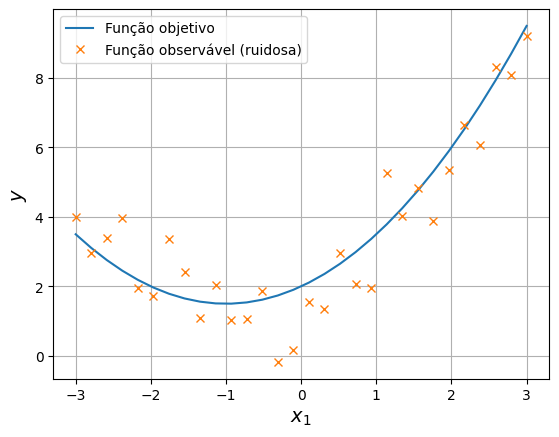

In [4]:
plt.plot(x1, y, label='Função objetivo')
plt.plot(x1, y_noisy, 'x', label='Função observável (ruidosa)')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
# Show the plot.
plt.show()

**Observação**: Claramente o mapeamento acima não pode ser aproximado por uma reta, por exemplo, pois o atributo $x_1$ não é linearmente mapeado em $y$.

## Regressão polinomial com funções hipótese com ordens diferentes.

Para criar os modelos de regressão polinomial, utilizamos 4 classes da biblioteca SciKit-Learn: `PolynomialFeatures`, `StandardScaler`, `LinearRegression` e `Pipeline`, as quais têm suas funções explicadas a seguir:

+ `PolynomialFeatures`: Cria a **matriz de atributos polinomiais** de acordo com a ordem passada para o construtor da classe. O objeto desta classe cria **combinações polinomiais dos atributos** de entrada com grau igual ao especificado. A classe pode ser configurada para adicionar o atributo de bias ou não através do parâmetro `include_bias`, que, por padrão, é igual a `True`. Para mais informações, leia a documentação da classe: [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures).
   + Exemplo para um polinômio de ordem 2 em uma variável (i.e., com um atributo), $x_1(n)$
$$y(n) =a_0 + a_1 x_1(n) + a_2 x_1^2(n)$$
   + Nesse caso a **matriz de atributos polinomial** terá $N \times M+1$ dimensões e o seguinte formato
$$\textbf{X} = [\textbf{x}_0, \textbf{x}_1, \textbf{x}_1^2], $$
onde $\textbf{x}_0$ é vetor de atributos de bias, ou seja, o vetor com todos os valores iguais a 1, o qual é adicionado automaticamente à matriz se `include_bias=True`, e $\textbf{x}_1$ é o vetor com todos os valores do atributo $x_1$.
   + Por padrão, `include_bias=True`, porém, como na sequência nós padronizamos a matriz de atributos polinomial, se ela contiver a coluna do atributo de bias, a padronização fará com que os valores desta coluna se tornem todos iguais a zero, fazendo com que o modelo não se ajuste bem aos dados.
    

+ `StandardScaler`: Realiza a padronização dos atributos. O escalonamento de atributos se torna imprescindível quando utilizamos funções hipótese polinomiais, pois os termos do polinômio podem fazer com que os valores dos atributos do polinômio tenham valores muito grandes. Para mais informações, leia a documentação da classe: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler).
    + Por exemplo, se $x_1$ varia entre 0 e 10, $x_1^2$ irá variar entre 0 e 100 e assim por diante.


+ `LinearRegression`: Realiza a regressão linear com a **matriz de atributos polinomial escalonada**. Esta implementação utiliza a **equação normal** para resolver o problema da regressão. Para mais informações, leia a documentação da classe: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression).
  + Por padrão, o parâmetro `fit_intercept` é igual a `True`, ou seja, o peso $a_0$ será estimado.
  + Se os parâmetros `fit_intercept` e `include_bias`, da classe `PolynomialFeatures`, forem iguais a `True`, a classe `LinearRegression` entende que, além do atributo de bias, $x_0$, existe um outro atributo, que, na verdade, é a coluna do atributo de bias, $x_0$, adicionada pela classe `PolynomialFeatures`. Portanto, configurar ambos os parâmetros com o valor `True` é reduntante e faz com que o modelo não se ajuste bem aos dados.

+ `Pipeline`: Sequencializa a aplicação de transformadores (e.g., `PolynomialFeatures`, `StandardScaler`) aos dados e ao final treina e realiza predições com o objeto da classe `LinearRegression`. Para mais informações, leia a documentação da classe: [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html?highlight=pipeline#sklearn.pipeline.Pipeline).


**OBS**.: Treinamos e validamos os modelos com o mesmo conjunto. Porém, em breve, veremos que para encontrar a ordem ideal do modelo, é importante  termos dois conjuntos, um para o treinamento do modelo e outro para verificar sua capacidade de generalização.

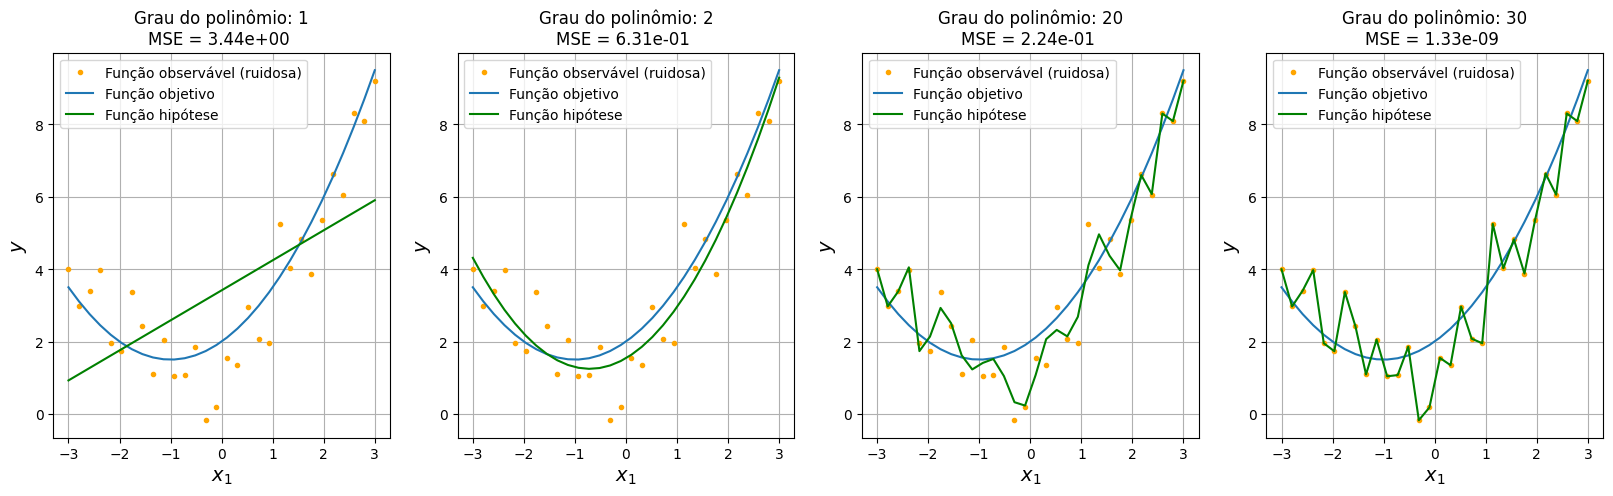

In [5]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Create a figure.
plt.figure(figsize=(20, 5))

# Loop that iterates over the different degree values.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    # Each object can be accessed through its string.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)

    # Use the trained model for prediction.
    y_pred = polynomial_regression.predict(x1)

    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, y_pred)

    # Comparação entre as funções objetivo, observável e hipótese.
    plt.plot(x1, y_noisy, '.', color='orange', label='Função observável (ruidosa)')
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, y_pred, 'g', label='Função hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e} ".format(degrees[i], mse))

# Show the plot.
plt.show()

#### Observações

+ O polinômio de ordem 1 (i.e., uma reta) **não consegue se contorcer o suficiente para aproximar a função verdadeira**.
    + O polinômio de ordem 1 não tem flexibilidade (i.e., graus de liberdade) o suficiente para capturar o comportamento da função objetivo.
    + Esse comportamento é conhecido como **subajuste** ou **underfitting**, do inglês: o modelo tem baixa flexibilidade e baixa capacidade de generalização.
        + **Generalização**: capacidade do modelo em predizer corretamente valores que não foram usados durante seu treinamento.
    + O erro quadrático médio (MSE) produzido pelo modelo é alto tanto para os exemplos do conjunto de treinamento quanto para dados inéditos.


+ O polinômio de ordem 2 se ajusta bem à função verdadeira.
    + O modelo apresenta boa relação de compromisso entre flexibilidade e capacidade de generalização.
    + MSE é próximo do esperado, ou seja, próximo da variância do ruído, que é igual a 1.    
    + O MSE produzido pelo modelo é baixo para os exemplos do conjunto de treinamento e para dados inéditos.


+ Já os polinômios de ordem 20 e 30 têm flexibilidade tão alta que se ajustam não à função verdadeira, mas sim ao ruído presente nas amostras.
    + É como se o modelo **memorizasse** os dados (ruidosos) de treinamento.
    + O modelo se ajusta mais e mais ao conjunto ruidoso de treinamento conforme sua ordem (i.e., grau de liberdade) se aproxima do número de amostras do conjunto.
    + Esse comportamento é conhecido como **sobreajuste** ou **overfitting**, do inglês: o modelo tem flexibilidade muito alta e capacidade de generalização muito baixa (modelo aprendido se distancia muito do modelo gerador).
    + O MSE produzido pelo modelo é muito baixo para os exemplos do conjunto de treinamento e muito alto para exemplos inéditos.


+ Como podemos percerber, o MSE é menor para o polinômio de ordem 30, pois devido à sua alta "complexidade/flexibilidade" ele se **ajusta** quase que perfeitamente aos dados de treinamento, "aprendendo" até o ruído presente nas amostras.
    + A predição feita com o próprio conjunto usado para o treinamento resulta em valores de saída idênticos aos aprendidados pelo modelo, resultado em um erro praticamente nulo.

## Gerando um conjunto de dados pequeno ($N = 30$ amostras), porém, sem ruído.

Usamos a mesma função objetivo anterior, porém, não adicionamos ruído a ela.

In [6]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [7]:
# Sets the number of examples.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function
y = 2 + x1 + 0.5*x1**2

# Observable function.
y_noisy = y

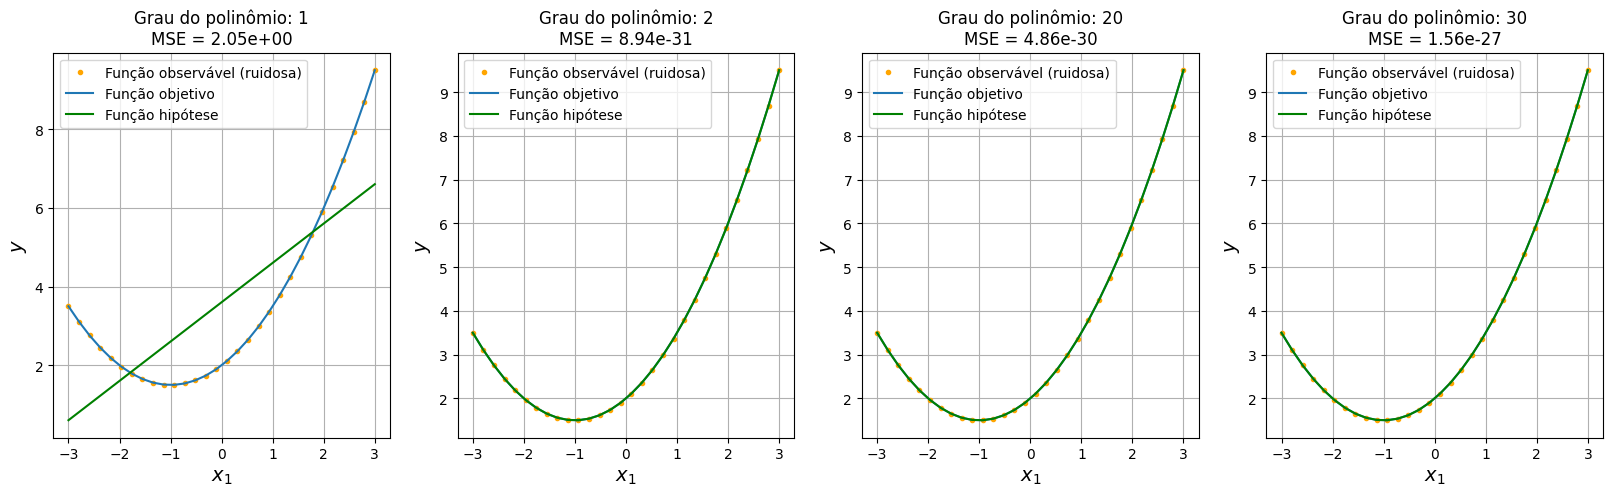

In [8]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)

    # Use the trained model for prediction.
    y_pred = polynomial_regression.predict(x1)

    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, y_pred)

    # Comparação entre as funções objetivo, observável e hipótese.
    plt.plot(x1, y_noisy, '.', color='orange', label='Função observável (ruidosa)')
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, y_pred, 'g', label='Função hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

# Show the plot.
plt.show()

#### Observações

+ Como não existe ruído sendo adicionado aos exemplos do modelo gerador, **qualquer polinômio com ordem maior ou igual à ordem do modelo gerador** (neste caso, um polinômio de ordem 2) já consegue aproximar perfeitamente os dados de treinamento.
   * Quanto menor a quantidade de ruído, menor a probabilidade de sobreajuste.


+ Porém, mesmo sem ruído algum, a reta (polinômio de ordem 1) não tem flexibilidade o suficiente para capturar o comportamento da função objetivo.
    + Ou seja, o fator limitante aqui é a complexidade (i.e., ordem do polinômio).

## Gerando um conjunto de treinamento maior ($N = 1000$ amostras) e com ruído

Usamos a mesma função objetivo anterior, mas agora com ruído e mais amostras.

In [9]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [10]:
# Sets the number of examples.
N = 1000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function
y = 2 + x1 + 0.5*x1**2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

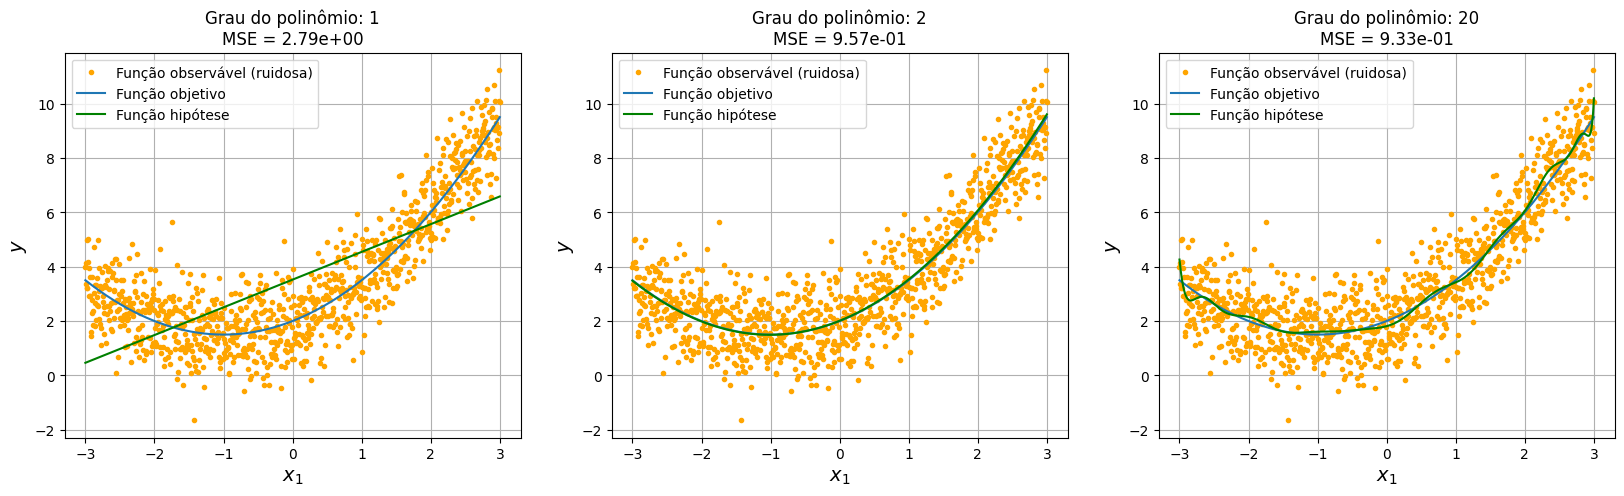

In [11]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20]

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)

    # Use the trained model for prediction.
    y_pred = polynomial_regression.predict(x1)

    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, y_pred)

    # Comparação entre as funções objetivo, observável e hipótese.
    plt.plot(x1, y_noisy, '.', color='orange', label='Função observável (ruidosa)')
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, y_pred, 'g', label='Função hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

# Show the plot.
plt.show()

#### Observações

+ Para ordem 2, vemos que o aumento do conjunto de treinamento resultou em um modelo melhor.


+ Porém, com o aumento da ordem do polinômio, percebemos que o modelo começa a se sobreajustar aos dados de treinamento, mas percebam que ele se sobreajusta bem menos do que no caso com 30 amostras, pois o número de amostras é muito maior do que a ordem do modelo.
    + Ou seja, o modelo não tem flexibilidade (i.e., graus de liberdade) o suficiente para memorizar as amostras de treinamento.

+ Se a ordem do modelo é maior ou igual a do modelo gerador, a aproximação obtida por ele será melhor quanto maior for o conjunto de treinamento (veremos na sequência com um conjunto ainda maior).

+ No caso de um polinômio de ordem 1, não importa o quão grande seja o conjunto de treinamento, ele nunca irá se ajustar ao modelo gerador, pois ele não tem flexibilidade o suficiente.

## Gerando um conjunto de treinamento maior ainda ($N = 100.000$ amostras)

Usamos a mesma função objetivo anterior, com ruído e muito mais amostras.

In [12]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [13]:
# Sets the number of examples.
N = 100000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y = 2 + x1 + 0.5*x1**2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

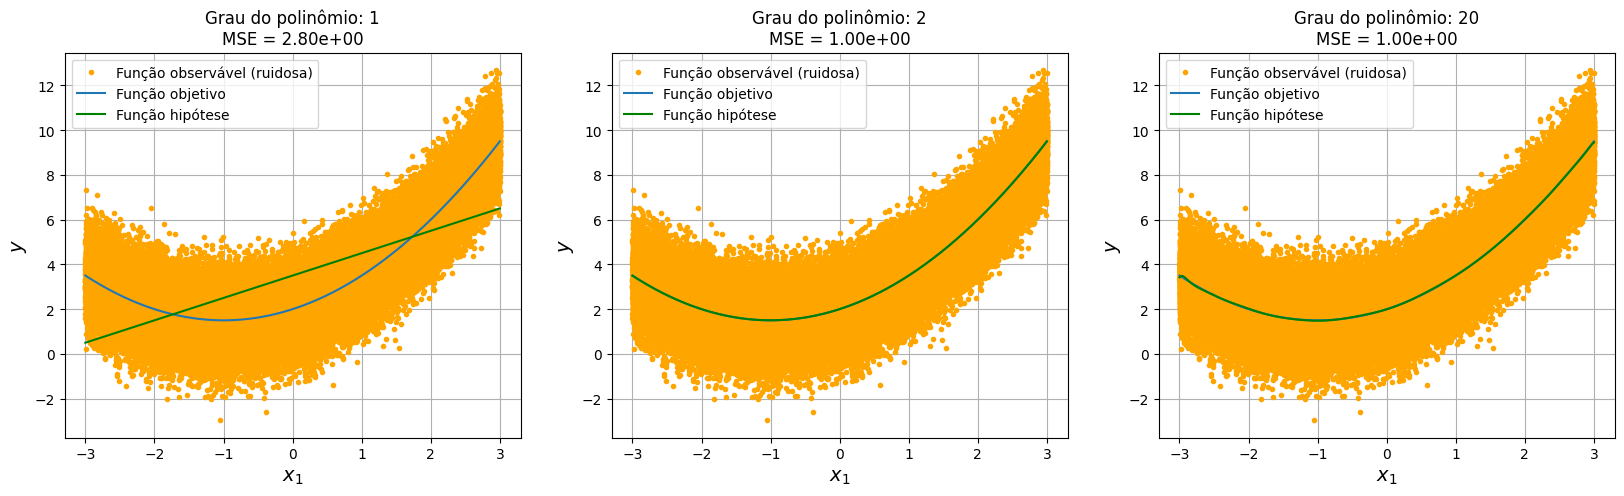

In [14]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20]

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)

    # Use the trained model for prediction.
    y_pred = polynomial_regression.predict(x1)

    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, y_pred)

    # Comparação entre as funções objetivo, observável e hipótese.
    plt.plot(x1, y_noisy, '.', color='orange', label='Função observável (ruidosa)')
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, y_pred, 'g', label='Função hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

# Show the plot.
plt.show()

#### Observações

+ Notem que para modelos com grau maior ou igual ao necessário, a função hipótese polinomial **passa** pelo **meio** dos dados, pois é nesta posição que ela apresenta **erro** (quadrático) **médio** mínimo para todos os valores de $x_1$.


+ Vejam que como as ordens dos polinômios são muito menores (2 e 20) do que a quantidade de amostras, a função hipótese polinomial escolhida não se ajusta perfeitamente aos pontos (pois não tem flexibilidade o suficiente), mas acaba se ajustando à média dos valores de $y$ ao longo dos valores de $x_1$.


+ Como utilizamos muitos exemplos de treinamento, a capacidade (i.e., flexibilidade) dos modelos não é suficiente para memorizar todos os pontos, ele então deixa de aprender o ruído para se concentrar em aprender a função por trás do processo de geração dos dados.


+ O polinômio de ordem 1 continua não tendo flexibilidade o suficiente para aproximar a função objetivo, mesmo com um número muito grande de amostras.

## Conclusões

+ Para evitar o **sobreajuste**:
    + Diminuímos a complexidade do modelo (no caso dos polinômios, reduzimos sua ordem).
    + Aumentamos o conjunto de treinamento de modo a termos muito mais amostras do que graus de liberdade do modelo.
    
  
+ Para evitar o **subajuste**:
    + Não importa o tamanho do conjunto de treinamento, o modelo não tem flexibilidade o suficiente para capturar o comportamento do modelo gerador.
    + A única forma para evitar o subajuste é aumentar a complexidade do modelo (no caso dos polinômios, aumentar sua ordem).
<br/><br/>


+ Em todos os exemplos acima, nós sabíamos a ordem da função objetivo e, assim, ficou fácil saber qual a melhor ordem para a função objetivo.

+ Porém, e quando nós não conhecemos a ordem por trás do modelo gerador, qual ordem devemos utilizar?
    
+ Na sequência, veremos como encontrar **quantitativamente** um modelo que apresente uma **boa relação de compromisso entre flexibilidade e grau de generalização**.
    + Para isso, compararemos os erros obtidos com um conjunto de treinamento e um de validação (exemplos inéditos) para vários níveis de complexidade do modelo (no caso dos polinômios, para várias ordens).